In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# The Python Scientific Ecosystem

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<div style="font-size:0.8em; color: #555">2019-04-04 Session 3
<span style="float:right">Peter Regner</span>
</div>

# The Python Scientific Ecosystem

<img alt="Python scientific ecosystem" src="images/python-scientific-ecosystem.png" style="width:800px;">

<small>Source: https://speakerdeck.com/jakevdp/the-state-of-the-stack-scipy-2015-keynote?slide=8</small>

# The Python Scientific Ecosystem

- **numpy**: a `np.ndarray` represents a multidimensional, homogeneous array of fixed-size items (a Python list may contain objects of mixed types)

- **scipy**: implementations of algorithms for data: filters, numerical optimization, interpolation, linalg, statistics, ...

- **pandas**: `pd.DataFrame` and `pd.Series`, great for things like time series

- **dask**: parallel computing

- **xarray**: `xr.DataArray` is basically a `np.ndarray` with named dimensions with built-in support for `dask`, `xr.DataSet` similar to `pd.DataFrame`

# Python vs. other languages and their applications

<img src="images/language-comparison-datascience.png" style="width:800px;">

<small>Source: https://speakerdeck.com/chdoig/the-state-of-python-for-data-science-pyss-2015?slide=22</small>

# Runtime performance comparison


<img src="images/benchmarks.svg" style="width:800px">

<small>Note that this comparison is not very fair. The Python tests are mostly done with pure Python. One can easily speed-up tests by using numpy or other libraries. Adding ``@numba.jit`` to the Fibonacci test causes a speed up of factor 50 (tested with $n=30$).</small>

<small>Source: https://julialang.org/benchmarks/</small>

# How to make code run fast?

<br><br>
**TL;TR: Don't do loops!**

(and use numpy)

# How to make code run fast?

- profile your code
- use the best algorithm
- use some fancy libraries
- caching results
- buy faster hardware
- make things parallel (and buy more hardware)
- use CUDA (and buy graphic cards)

# Profile your code!

<img src="images/optimization.png" style="600px">

<small>Source: https://xkcd.com/1691/</small>

# Profile your code!

Profiling = measure runtime of a particular piece of code (often with the aim of optimization)

The most simple approach to measure how long it takes to run a piece of code:

In [2]:
import time

def do_something_fancy():
    time.sleep(0.3)

t0 = time.time()

do_something_fancy()

elapsed_time = time.time() - t0

elapsed_time

0.30067896842956543

# Profile your code!

In [3]:
%timeit 39 + 2

8.91 ns ± 0.0469 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


<small>For more options: https://docs.python.org/3/library/timeit.html</small>

# Profile your code!

Less popular, but really great to test parts of your code while running everything:

In [4]:
from time import sleep
import logging

In [5]:
from contexttimer import timer, Timer

with Timer() as t:
    sleep(1)
    
t.elapsed

1.0012243579985807

In [6]:
logging.basicConfig(level=logging.INFO)

@timer()
def sleep_one_sec():
    sleep(1)
    
sleep_one_sec()

function sleep_one_sec execution time: 1.001 


<small>Link: https://pypi.org/project/contexttimer/</small>

# Profile your code: RunSankeRun


<img src="images/run-snake-run.png" style="600px">

# Fast calculation


In [7]:
def f(n):
    if n  < 1:
        return 0
    elif n == 1:
        return 1
    
    return f(n - 2) + f(n - 1)

In [8]:
[f(i) for i in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

This slide is just a reminder for how important good naming is ;-)

# Fast calculation of Fibonacci numbers


In [9]:
def fibonacci_number(n):
    """Return the n-th Fibonacci number (but you might need to be patiently waiting for the result)."""
    if n  < 1:
        return 0
    elif n == 1:
        return 1
    
    return fibonacci_number(n - 2) + fibonacci_number(n - 1)

In [10]:
[fibonacci_number(i) for i in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

The used algorithm with double recursion has exponential time complexity, but the problem could be solved in linear time.

# Asymptotic time complexity and the Big Oh


Linear time complexity $O(n)$:

- `x in l`  (for ``len(l) == n``)
- looping over something of length n
- max(`l`)

Logarithmic time complexity $O(log(n))$:

* binary search in a sorted list

# Asymptotic time complexity and the Big Oh


Logarithmic time complexity $O(n \cdot log(n))$:

* sorting a list

Quadratic complexity $O(n^2)$:

* bubble sort (a slower sorting algorithm)

# Asymptotic time complexity and the Big Oh


Cubic time complexity $O(n^3)$:

* calculating the mean of wind speeds over `time x longitude resolution x latitude resolution`

Constant time $O(1)$:

* `x[5]` access item in a list
* `x in d` for `type(d) == dict`  (in average, not worst case)
* `x in s` for `type(s) == set`  (in average, not worst case)

<small>Source: https://wiki.python.org/moin/TimeComplexity</small>

# Fibonacci numbers: use good algorithms

In [11]:
def fibonacci_number(n):
    """Return the n-th Fibonacci number (but you might need to be patiently waiting for the result)."""
    if n  < 1:
        return 0
    elif n == 1:
        return 1
    
    return fibonacci_number(n - 2) + fibonacci_number(n - 1)

In [12]:
[fibonacci_number(i) for i in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

The double recursive algorithm for calculating Fibonacci numbers is in $O(2^n)$, which is not tight.

A the tight bound is $O(\phi^n)$ where $\phi = \frac{1 + \sqrt{5}}{2}$ is the golden ratio.

# Fibonacci numbers: use good algorithms

In [13]:
def fibonacci_number_linear(n):
    """Return the n-th Fibonacci number a bit faster."""
    element, subsequent = 0, 1
    for i in range(n):
        element, subsequent = subsequent, element + subsequent
    
    return subsequent

In [14]:
[fibonacci_number_linear(i) for i in range(10)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [15]:
%timeit fibonacci_number(35)

4.1 s ± 7.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit fibonacci_number_linear(35)

3.03 µs ± 17.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Fast calculation of Fibonacci numbers: Caching

In [17]:
import functools

@functools.lru_cache()
def fibonacci_number_memoized(n):
    """Return the n-th Fibonacci number (but you might need to be patiently waiting for the result)."""
    if n  < 1:
        return 0
    elif n == 1:
        return 1
    
    return fibonacci_number_memoized(n - 2) + fibonacci_number_memoized(n - 1)

In [18]:
[fibonacci_number_memoized(i) for i in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [19]:
%timeit fibonacci_number(35)

4.19 s ± 90.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%timeit fibonacci_number_memoized(35)

74.2 ns ± 0.512 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Fast calculation of Fibonacci numbers: Caching


I am currently looking for something like a file based `lru_cache()` to make it easy to play with different parameters for simulations that take ~10 minutes or so.

# Speedup by use of some fancy libraries


In [21]:
import numba

@numba.jit
def fibonacci_number_numba(n):
    """Return the n-th Fibonacci number way faster."""
    element, subsequent = 0, 1
    for i in range(n):
        element, subsequent = subsequent, element + subsequent
    
    return subsequent

In [22]:
%timeit fibonacci_number_numba(35)

270 ns ± 22.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Speedup by use of some fancy libraries


In [23]:
%timeit sum(range(10_000))

153 µs ± 4.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Make it faster using some fancy library:

In [24]:
%timeit np.sum(np.arange(10_000))

20.2 µs ± 479 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Make it faster using the Small Gauss, but kind of missing the purpose of the example... ;-)

In [25]:
%timeit 10_000 * (10_000 - 1) // 2

9.31 ns ± 0.424 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


# Speedup by other fancy alterantives to pure Python

Alternative Python interpreters to the standard CPython implementation:

- pypy: an Python interpreter written in Python
- Cython: C-like performance, compiled

Extensions in other languages: C, C++, Fortran, ...

Other languages: Julia

# Buy faster hardware

Okay, that one is easy, you need only enough money!

<img src="images/lotto.jpg" style="width:800px">

<small>
Copyright: Österreichische Lotterien<br>
Source: https://www.lotterien.at/presse/fotos/
</small>

# Buy faster hardware

<img src="images/trump-how_to_get_rich.jpg" style="height:600px">

<small>Source: https://en.wikipedia.org/wiki/File:Trump_-_How_to_Get_Rich,_book_cover.jpg</small>

# Make things parallel

CPython is inherently single-core due to the global interpreter lock (GIL).

Python threads actually slow down CPU bound tasks.

<small>Source: https://callhub.io/understanding-python-gil/
https://realpython.com/python-gil/
https://wiki.python.org/moin/GlobalInterpreterLock</small>

# Make things parallel

- `multiprocessing`: part of the core library
- `dask`: high comfort solution, but also low level support (MPI)
- `joblib`, `torch.multiprocessing`: sorry, I don't know yet

Disclaimer: not sure if this list is complete.

# Make things parallel: using big data

Hadoop, Spark, ...

<img src="images/map-reduce.png" style="width:600px">

# Make things run on the GPU

- [numba](http://numba.pydata.org/)
- [PyTorch](https://pytorch.org/)
- [PyCUDA](https://mathema.tician.de/software/pycuda/)

For machine learning:
- Theano
- TensorFlow
- ...

# Latency Numbers Every Programmer Should Know  (~2012)

    L1 cache reference                           0.5 ns
    Branch mispredict                            5   ns
    L2 cache reference                           7   ns                      14x L1 cache
    Mutex lock/unlock                           25   ns
    Main memory reference                      100   ns                      20x L2 cache, 200x L1 cache
    Compress 1K bytes with Zippy             3,000   ns        3 us
    Send 1K bytes over 1 Gbps network       10,000   ns       10 us
    Read 4K randomly from SSD*             150,000   ns      150 us          ~1GB/sec SSD
    Read 1 MB sequentially from memory     250,000   ns      250 us
    Round trip within same datacenter      500,000   ns      500 us
    Read 1 MB sequentially from SSD*     1,000,000   ns    1,000 us    1 ms  ~1GB/sec SSD, 4X memory
    Disk seek                           10,000,000   ns   10,000 us   10 ms  20x datacenter roundtrip
    Read 1 MB sequentially from disk    20,000,000   ns   20,000 us   20 ms  80x memory, 20X SSD
    Send packet CA->Netherlands->CA    150,000,000   ns  150,000 us  150 ms

    Notes
    -----
    1 ns = 10^-9 seconds
    1 us = 10^-6 seconds = 1,000 ns
    1 ms = 10^-3 seconds = 1,000 us = 1,000,000 ns

Reading 1MB from memory vs from disk (with seek):

In [26]:
(20e-3 + 10e-3) / 250e-6

120.0

Source: 
 - https://gist.github.com/jboner/2841832
 - https://gist.github.com/GLMeece/b00c9c97a06a957af7426b1be5bc8be6
 - http://norvig.com/21-days.html#answers
 - https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html

# Don't forget about numerics!

In [27]:
0.1 + 0.2 == 0.3

False

# Questions?

# Exercise

Try to find out why slow_average.py is slow and make it fast!

# Tips and tricks

Python can be used:

- as Python **program/script/module**, i.e. in `*.py` files: long running calculations, reproducible results, avoiding code duplication

- **IPython** terminal: try out something quickly (and throw it away)

- **Jupyter notebook** and Jupyter lab: make drafts and summarize exploration of data

- Scientific **cell mode**: PyCharm or Spyder

- **unit tests**: instead of testing manually, run your your tests

All of them are also available directly in many IDEs/editors!

# Tips and tricks

IPython:

Use `CTRL` + `R` to find older commands

...or use more fancy commands:
```
>>> %history ~1/1-100
>>> %edit ~1/1-100
>>> %notebook /tmp/my_new_jupyter_notebook.ipynb
```

Getting help:
    
```
>>> np.mean?
```

Display source code:
```
>>> np.mean??
```

# Tips and tricks

Jupyter notebooks: see [example-notebook.ipynb](example-notebook.ipynb)

# Tips and tricks

Editor must have features:

- jump to definition
- syntax highlighting
- linting

Really helpful shortcuts:
- search for word under cursor \*
- duplicate line
- empty line/above below
- block select
- macros

Also helpful:
- shortcuts to open 
- tools for search in all files in a folder, in linux `grep` (or faster: `git grep`, `ripgrep`, `ag`, ...)

# Tips and tricks

Keep an eye on memory usage and CPU when running code on your machine!

For windows, maybe this helps: https://entropy6.com/xmeters/

# Numpy

...introduces the type `np.ndarray`:

In [28]:
a = np.arange(8)
a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [29]:
a.shape

(8,)

In [30]:
a.reshape(2, 4)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [31]:
a.reshape(2,4).ndim

2

# Numpy

Functions to create an `np.ndarray`:

In [32]:
# note that we use np.array:
np.array([[1, 2],
          [3, 4]])

array([[1, 2],
       [3, 4]])

In [33]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

# Numpy

Functions to create an `np.ndarray`:

In [34]:
np.zeros((2,2), dtype=np.bool)

array([[False, False],
       [False, False]])

In [35]:
np.empty(4, dtype=np.float32)  # amazingly fast but dangerously uninitialized!

array([0.   , 0.   , 0.   , 1.875], dtype=float32)

`np.diag`, `np.tri`, ...

#  Numpy: Broadcasting

In [36]:
5 * np.ones((3,3))

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [37]:
np.zeros((3, 4, 2)) + np.array([11, 22])

array([[[11., 22.],
        [11., 22.],
        [11., 22.],
        [11., 22.]],

       [[11., 22.],
        [11., 22.],
        [11., 22.],
        [11., 22.]],

       [[11., 22.],
        [11., 22.],
        [11., 22.],
        [11., 22.]]])

#  Numpy: Broadcasting

```
A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5
```

In [38]:
factor = np.array([[11], [22], [33], [44]])
factor.shape

(4, 1)

In [39]:
result = np.ones((3, 4, 2)) * factor
result.shape

(3, 4, 2)

In [40]:
result

array([[[11., 11.],
        [22., 22.],
        [33., 33.],
        [44., 44.]],

       [[11., 11.],
        [22., 22.],
        [33., 33.],
        [44., 44.]],

       [[11., 11.],
        [22., 22.],
        [33., 33.],
        [44., 44.]]])

<small>Link: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html</small>

# Broadcasting: Numpy

In [41]:
latitude_resolution = 100
longitude_resolution = 110
time_resolution = 365

# in m/s, postfixing with _ms does not work well, because ms is miliseconds... :-/
wind_speeds = np.random.weibull(10, size=(latitude_resolution, longitude_resolution, time_resolution))

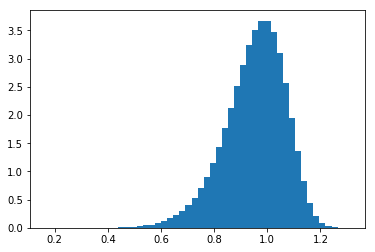

In [42]:
_ = plt.hist(wind_speeds.flatten(), density=True, bins=50)

# Broadcasting: Numpy

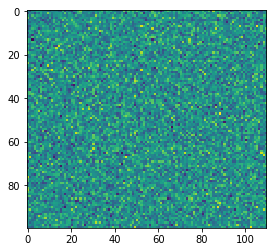

In [43]:
# m/s --> kW
wind_to_power = np.random.normal(300, scale=20, size=(latitude_resolution, longitude_resolution))
plt.imshow(wind_to_power)

# Broadcasting: Numpy

In [44]:
wind_to_power * wind_speeds

ValueError: operands could not be broadcast together with shapes (100,110) (100,110,365) 

In [45]:
wind_speeds.shape

(100, 110, 365)

In [46]:
wind_to_power.shape

(100, 110)

# Broadcasting: Numpy

In [47]:
wind_speeds = np.rollaxis(wind_speeds, 2)

In [48]:
wind_speeds.shape

(365, 100, 110)

In [49]:
wind_to_power.shape

(100, 110)

In [50]:
average_power = (wind_to_power * wind_speeds).mean(axis=0)

# Xarray has named dimensions!

In [51]:
wind_speeds_raw = np.random.weibull(10, size=(latitude_resolution, longitude_resolution, time_resolution))
wind_speeds = xr.DataArray(wind_speeds_raw, dims=('latitude', 'longitude', 'time'))

In [52]:
wind_speeds

<xarray.DataArray (latitude: 100, longitude: 110, time: 365)>
array([[[0.894741, 0.990923, ..., 0.899981, 1.02659 ],
        [1.020849, 0.624725, ..., 1.005816, 0.784432],
        ...,
        [0.811398, 0.986918, ..., 0.939516, 1.110318],
        [0.976799, 0.977067, ..., 1.012583, 0.917623]],

       [[0.993984, 1.035443, ..., 1.069029, 0.649291],
        [0.689977, 0.811261, ..., 0.951617, 1.186624],
        ...,
        [0.779403, 0.78594 , ..., 1.111433, 0.977469],
        [0.801538, 0.939266, ..., 0.780707, 0.872474]],

       ...,

       [[0.886154, 0.922524, ..., 1.112934, 1.119962],
        [1.012106, 0.846248, ..., 1.053159, 1.054678],
        ...,
        [0.85447 , 0.881155, ..., 0.844021, 1.054484],
        [0.831682, 1.071129, ..., 0.94867 , 1.095568]],

       [[0.929042, 0.984445, ..., 1.034028, 0.978367],
        [1.021332, 1.025009, ..., 0.888362, 0.806673],
        ...,
        [1.122647, 1.001822, ..., 0.902706, 0.943693],
        [0.991303, 0.947753, ..., 0.88277 

In [53]:
wind_to_power_raw = np.random.normal(300, scale=20, size=(latitude_resolution, longitude_resolution))
wind_to_power = xr.DataArray(wind_to_power_raw, dims=('latitude', 'longitude'))

In [54]:
(wind_to_power * wind_speeds).mean(dim='time')

<xarray.DataArray (latitude: 100, longitude: 110)>
array([[267.155648, 260.649821, 304.058154, ..., 298.093269, 262.57353 ,
        278.500393],
       [300.75415 , 258.107828, 291.038777, ..., 288.448435, 242.067571,
        310.542559],
       [290.045851, 285.304637, 290.781913, ..., 291.486622, 315.935329,
        259.97107 ],
       ...,
       [291.441859, 314.460253, 278.068775, ..., 299.31902 , 286.979371,
        278.728631],
       [293.0093  , 309.4248  , 261.796419, ..., 272.178113, 279.230288,
        280.699875],
       [306.753309, 322.732434, 299.182011, ..., 278.764251, 277.416258,
        278.512955]])
Dimensions without coordinates: latitude, longitude

# Numpy: this is how you make things fast!

In [55]:
a = 39 * np.ones(10**5)
b = 2 * np.ones(10**5)

In [56]:
%timeit [i + j for i, j in zip(a, b)]  # list comprehension is still better than a loop!

30.7 ms ± 952 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
%timeit a + b

50.1 µs ± 4.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#  Numpy: Slicing

In [58]:
d = np.arange(5)
d

array([0, 1, 2, 3, 4])

In [59]:
d[2:4]

array([2, 3])

In [60]:
d[::2]

array([0, 2, 4])

In [61]:
d[::-1]

array([4, 3, 2, 1, 0])

In [62]:
some_ones = np.ones((3,5))
some_ones[:, :-1]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

#  Numpy: when is data copied?

It's complicated but really important... :-/

In [63]:
some_numbers = np.arange(5)
less_numbers = some_numbers[:-2]

In [64]:
some_numbers

array([0, 1, 2, 3, 4])

In [65]:
less_numbers

array([0, 1, 2])

In [66]:
id(some_numbers)

140265030355984

In [67]:
id(less_numbers)

140265030356464

#  Numpy: when is data copied?

In [68]:
some_numbers[0] = 42

In [69]:
less_numbers

array([42,  1,  2])

**Slicing returns a view!**

(something like two names pointing to the same object, but now there are two objects pointing to the same memory)

In [70]:
class Shrug:
    def __repr__(self):
        return '¯\_(ツ)_/¯'
    
(ツ) = Shrug()

In [71]:
(ツ)

¯\_(ツ)_/¯

<small>Source: https://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html</small>

#  Numpy: when is data copied?

In [72]:
some_numbers

array([42,  1,  2,  3,  4])

Fancy indexing returns a copy, not a view:

In [73]:
fancy_indexing = some_numbers[[0, 2, -1]]
fancy_indexing

array([42,  2,  4])

In [74]:
fancy_indexing[0] *= 2
fancy_indexing

array([84,  2,  4])

In [75]:
some_numbers

array([42,  1,  2,  3,  4])

#  Numpy: when is data copied?

In [76]:
some_numbers

array([42,  1,  2,  3,  4])

Same here:

In [77]:
fancy_indexing = some_numbers[[True, True, False, True, False]]
fancy_indexing

array([42,  1,  3])

In [78]:
fancy_indexing[0] *= 2
fancy_indexing

array([84,  1,  3])

In [79]:
some_numbers

array([42,  1,  2,  3,  4])

<small>More: https://jakevdp.github.io/PythonDataScienceHandbook/02.07-fancy-indexing.html</small>

# Plotting

- not so much interactive
    - matplotlib
    - seaborn

- interactive
    - plotly
    - bokeh

# Matplotlib, Pyplot, Pylab

- pyplot is an easier way to use matplotlib, but it can be dangerous (if used in parallel)
- for datascience pyplot should be good enough for most data-science or science-with-data applications
- pylab import pyblot and numpy for you, but it does a `from numpy import *` which overwrites e.g. the Python `sum()`

<small>Source: https://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related</small>

# Nice examples with pandas, matplotlib and seaborn

- https://github.com/caichinger/slides/blob/master/2019-03-19__DjangoVienna/1_groupby.ipynb
- https://github.com/caichinger/slides/blob/master/2019-03-19__DjangoVienna/2_timeseries.ipynb

# Exercise: plot cos(x) * cos(y)

Plot  $f(x,y) := cos(x) * cos(y)$!

(for $x,y \in \mathbb{R}, -10 \leq x \leq 10, -10 \leq y \leq 10$ with a resolution of $300 \times 300$)

Use the functions:
- `np.linspace`
- `np.meshgrid`
- `np.cos`, `np.sin`
- `plt.imshow`

In [80]:
resolution = 300
coords = np.linspace(-10, 10, num=resolution)
xx, yy = np.meshgrid(coords, coords)

# Exercise: plot cos(x) * cos(y)

In [81]:
xx[:4, :4]

array([[-10.        ,  -9.93311037,  -9.86622074,  -9.7993311 ],
       [-10.        ,  -9.93311037,  -9.86622074,  -9.7993311 ],
       [-10.        ,  -9.93311037,  -9.86622074,  -9.7993311 ],
       [-10.        ,  -9.93311037,  -9.86622074,  -9.7993311 ]])

In [82]:
yy[:4, :4]

array([[-10.        , -10.        , -10.        , -10.        ],
       [ -9.93311037,  -9.93311037,  -9.93311037,  -9.93311037],
       [ -9.86622074,  -9.86622074,  -9.86622074,  -9.86622074],
       [ -9.7993311 ,  -9.7993311 ,  -9.7993311 ,  -9.7993311 ]])

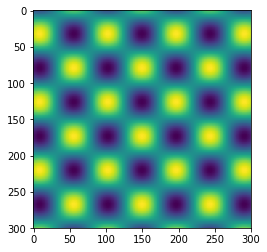

In [83]:
plt.imshow(np.cos(xx) * np.sin(yy))

# Exercise

Imagine an API which allows you to query locations of some object of interest (wind turbines, gas stations, ...). For some given location $x \in \mathbb{R}$ (=API input), the API will tell you the closest `num_neighbors` $\in \mathbb{N}$ object locations.

We are interested in getting all locations. For which/how many locations do we need to query?

- $N$ `locations` in 2D (picked randomly (uniform) from $[0,1] \times [0,1] \subseteq \mathbb{R}^2$
- `num_neighbors` is the number of locations an API request will return
- plot the map of `locations` with a resolution of `map_resolution` $\times$ `map_resolution` and as background mark positions with equal API answers with the same color

- ``np.linspace(start, stop, num=NUM)``
- ``xx, yy = np.meshgrid(x, y)``
- ``np.linalg.norm(x, axis=0)``

# Exercise: solution

In [84]:
N = 20
margin = 0.3
map_resolution = 900
num_neighbours = 2

In [85]:
np.random.seed(42)   # deterministic randomess, yeah!
locations = np.random.rand(2, N)

In [86]:
coords = np.linspace(-margin, margin + 1, num=map_resolution)

In [87]:
xx, yy = np.meshgrid(coords, coords)

In [88]:
# axis=0 <-- canvas x
# axis=1 <-- canvas y
# axis=2 <-- locations
distances = np.linalg.norm(locations.T - np.dstack((xx,yy))[:, :, np.newaxis, :], axis=3)

In [89]:
canvas = np.argsort(distances, axis=2)[:, :, :num_neighbours]
canvas = np.sort(canvas, axis=2)
canvas = np.sum(N**np.arange(num_neighbours)[::-1] * canvas, axis=2) 
canvas = canvas / canvas.max()

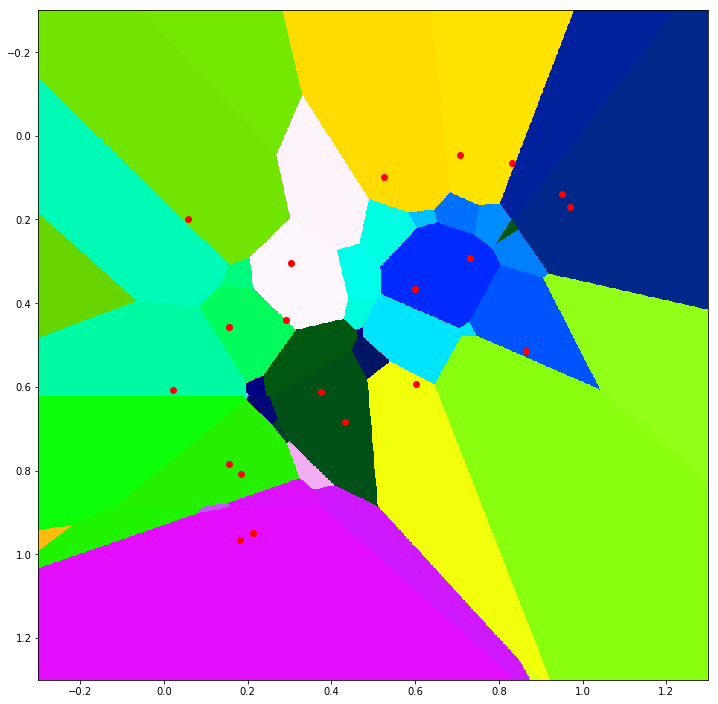

In [90]:
plt.imshow(canvas, extent=(-margin, 1 + margin, 1 + margin, -margin), cmap='gist_ncar')
ax = plt.plot(locations[0], locations[1], 'or')

ax[0].figure.set_figheight(16)
ax[0].figure.set_figwidth(12)

# Not covered in this workshop

- f-strings
- decorators
- context managers
- iterators
- generators
- data scraping
- packaging and package managers
- virtualenv, conda env, pipenv, ...
- `from __future__ import braces`